In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

In [9]:
# Creanos una sesión de Spark 🤑
spark = SparkSession.builder.getOrCreate()

datos = spark.read.csv("data/iris.csv", inferSchema="true", header="true")

#Contar los datos del CSV 😱
datos.count()


150

In [3]:
# Seleccionamos las columnas que vamo a usar "INPUT_COLS ✔" 
input_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
assemblesYeison = VectorAssembler(inputCols=input_cols, outputCol="features")
final_data = assemblesYeison.transform(datos)
final_data.show()

+------------+-----------+------------+-----------+-------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|species|         features|
+------------+-----------+------------+-----------+-------+-----------------+
|         5.1|        3.5|         1.4|        0.2| setosa|[5.1,3.5,1.4,0.2]|
|         4.9|        3.0|         1.4|        0.2| setosa|[4.9,3.0,1.4,0.2]|
|         4.7|        3.2|         1.3|        0.2| setosa|[4.7,3.2,1.3,0.2]|
|         4.6|        3.1|         1.5|        0.2| setosa|[4.6,3.1,1.5,0.2]|
|         5.0|        3.6|         1.4|        0.2| setosa|[5.0,3.6,1.4,0.2]|
|         5.4|        3.9|         1.7|        0.4| setosa|[5.4,3.9,1.7,0.4]|
|         4.6|        3.4|         1.4|        0.3| setosa|[4.6,3.4,1.4,0.3]|
|         5.0|        3.4|         1.5|        0.2| setosa|[5.0,3.4,1.5,0.2]|
|         4.4|        2.9|         1.4|        0.2| setosa|[4.4,2.9,1.4,0.2]|
|         4.9|        3.1|         1.5|        0.1| setosa|[4.9,

In [10]:
#Los clustering con KMeans clase pasada🥺
kmeans = KMeans(featuresCol="features", k=4)
model = kmeans.fit(final_data)
predictions = model.transform(final_data)
predictions = predictions.withColumnRenamed("prediction", "cluster")

#predictions = model.transform(final_data)
predictions.show()



+------------+-----------+------------+-----------+-------+-----------------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|         features|cluster|
+------------+-----------+------------+-----------+-------+-----------------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|[5.1,3.5,1.4,0.2]|      1|
|         4.9|        3.0|         1.4|        0.2| setosa|[4.9,3.0,1.4,0.2]|      1|
|         4.7|        3.2|         1.3|        0.2| setosa|[4.7,3.2,1.3,0.2]|      1|
|         4.6|        3.1|         1.5|        0.2| setosa|[4.6,3.1,1.5,0.2]|      1|
|         5.0|        3.6|         1.4|        0.2| setosa|[5.0,3.6,1.4,0.2]|      1|
|         5.4|        3.9|         1.7|        0.4| setosa|[5.4,3.9,1.7,0.4]|      1|
|         4.6|        3.4|         1.4|        0.3| setosa|[4.6,3.4,1.4,0.3]|      1|
|         5.0|        3.4|         1.5|        0.2| setosa|[5.0,3.4,1.5,0.2]|      1|
|         4.4|        2.9|         1.4|        0.2| se

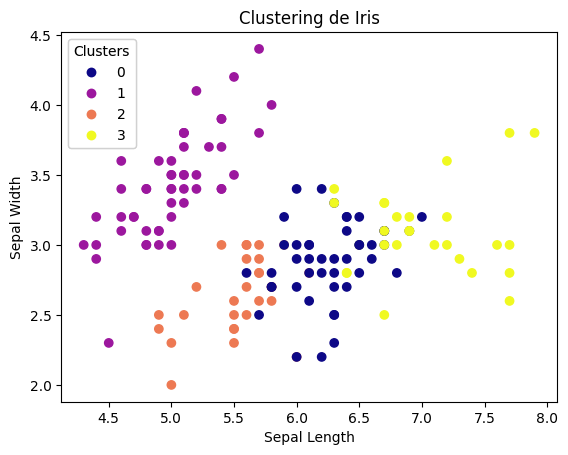

In [5]:
# Aca poenemos los datos para la visualización de los resultados del clustering
predictions_pd = predictions.select("sepal_length", "sepal_width", "petal_length", "petal_width", "cluster").toPandas()
fig, ax = plt.subplots()

# Scatter plot de los datos reales coloreados por clúster
scatter = ax.scatter(predictions_pd["sepal_length"], predictions_pd["sepal_width"], c=predictions_pd["cluster"], cmap="plasma")

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Clustering de Iris')
plt.show()



In [6]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import DenseVector


# Seleccionamos las columnas que se vamos a usar😃
regression_data = datos.select("sepal_length", "sepal_width")

# Combinar características en una columna de vectores
assembler = VectorAssembler(inputCols=["sepal_length"], outputCol="features")
regression_data = assembler.transform(regression_data)
regression_data.show()


+------------+-----------+--------+
|sepal_length|sepal_width|features|
+------------+-----------+--------+
|         5.1|        3.5|   [5.1]|
|         4.9|        3.0|   [4.9]|
|         4.7|        3.2|   [4.7]|
|         4.6|        3.1|   [4.6]|
|         5.0|        3.6|   [5.0]|
|         5.4|        3.9|   [5.4]|
|         4.6|        3.4|   [4.6]|
|         5.0|        3.4|   [5.0]|
|         4.4|        2.9|   [4.4]|
|         4.9|        3.1|   [4.9]|
|         5.4|        3.7|   [5.4]|
|         4.8|        3.4|   [4.8]|
|         4.8|        3.0|   [4.8]|
|         4.3|        3.0|   [4.3]|
|         5.8|        4.0|   [5.8]|
|         5.7|        4.4|   [5.7]|
|         5.4|        3.9|   [5.4]|
|         5.1|        3.5|   [5.1]|
|         5.7|        3.8|   [5.7]|
|         5.1|        3.8|   [5.1]|
+------------+-----------+--------+
only showing top 20 rows



In [7]:
# Inicializamos y ajustar el modelo de regresión lineal
lr = LinearRegression(featuresCol="features", labelCol="sepal_width")
lr_model = lr.fit(regression_data)

predictions = lr_model.transform(regression_data)

predictions.select("sepal_length", "sepal_width", "prediction").show()

+------------+-----------+------------------+
|sepal_length|sepal_width|        prediction|
+------------+-----------+------------------+
|         5.1|        3.5|3.1033343664866946|
|         4.9|        3.0| 3.115711326079527|
|         4.7|        3.2| 3.128088285672359|
|         4.6|        3.1|3.1342767654687753|
|         5.0|        3.6| 3.109522846283111|
|         5.4|        3.9| 3.084768927097446|
|         4.6|        3.4|3.1342767654687753|
|         5.0|        3.4| 3.109522846283111|
|         4.4|        2.9| 3.146653725061608|
|         4.9|        3.1| 3.115711326079527|
|         5.4|        3.7| 3.084768927097446|
|         4.8|        3.4| 3.121899805875943|
|         4.8|        3.0| 3.121899805875943|
|         4.3|        3.0|3.1528422048580236|
|         5.8|        4.0|3.0600150079117814|
|         5.7|        4.4|3.0662034877081976|
|         5.4|        3.9| 3.084768927097446|
|         5.1|        3.5|3.1033343664866946|
|         5.7|        3.8|3.066203

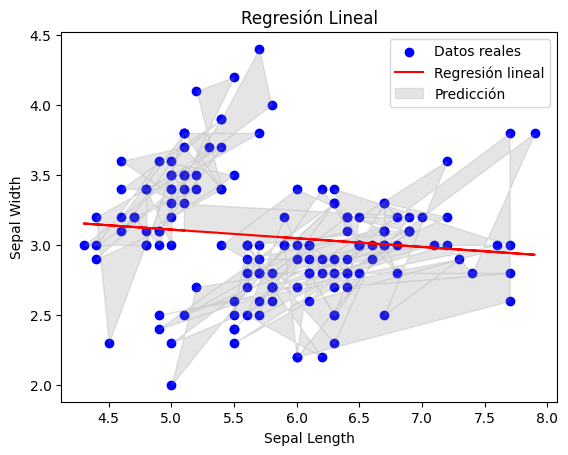

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convertimos los resultados a un DataFrame de Pandas para la visualización
predictions_pd = predictions.select("sepal_length", "sepal_width", "prediction").toPandas()

# Esto es para visualizar los datos y la línea de regresión
fig, ax = plt.subplots()

# Dibujamos los puntos de los datos
ax.scatter(predictions_pd["sepal_length"], predictions_pd["sepal_width"], label="Datos reales", color='blue')

# Dibujamos la línea de regresión 
ax.plot(predictions_pd["sepal_length"], predictions_pd["prediction"], label="Regresión lineal", color='red')

ax.fill_between(predictions_pd["sepal_length"], predictions_pd["sepal_width"], predictions_pd["prediction"], color='gray', alpha=0.2, label='Predicción')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Regresión Lineal')
ax.legend()
plt.show()